In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [39]:
df = pd.read_csv('result.csv')

In [40]:
len(df)

2000

In [41]:
df.head()

,Unnamed: 0,type,category,review,star
0,1,에어팟프로,별점,"누나한테 선물로 주려고 샀습니다. 그동안 여러개 샀는데, 정작 가족들에겐 챙겨주지못...",평점5
1,2,에어팟프로,별점,진작 살 걸 그랬어요.. 에어팟 2세대 무선충전 사용하고 있었는데 제가 왼쪽 귓구멍...,평점5
2,3,에어팟프로,별점,음질은 기존의 이어팟만 쓰다가 비교했을 때 유선보다 무선이 어쩔 수 없이 떨어진다는...,평점5
3,4,에어팟프로,별점,물건이 소진되어서 물건확보하고 배송까지 늦으면 2주까지 걸린다고 하셨는데 5일만에 ...,평점5
4,5,에어팟프로,별점,일단 다른 쇼핑몰보다 저렴하게 구매하고 배송도 빨라서 만족스러웠습니다! 기존에 모멘...,평점5


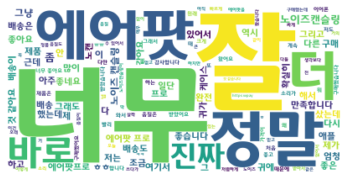

In [65]:
wordcloud = WordCloud(font_path='font/Daum_SemiBold.ttf',background_color='white').generate(' '.join(df['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
df['rating'] = df['star'].str.slice(start=2)

In [43]:
df['rating'] = df['rating'].astype(int) #점수만 필요하니 점수만 출력해서 int로 변환

In [44]:
df1 = df[['review','rating']]  #필요한 데이터만 추출

In [45]:
df1['rating'].unique() #평점 

array([5, 4, 2, 3, 1])

In [46]:
df1.info()  #결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2000 non-null   object
 1   rating  2000 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 23.6+ KB


In [47]:
df = df1.copy()

In [48]:
# 별점이 4,5인 리뷰는 1, 1,2,3인 리뷰는 0 부여
df['label'] = ['1' if t else '0' for t in list(df['rating'] >= 4)]

In [49]:
df[350:360]

,review,rating,label
350,배송도 생각보다 너무 빨리왔구 여기서 구입한 가장 큰 이유는 제조일자가 최신꺼로 많...,3,0
351,선물 받은 분이 좋아해요\n근데 7월로 와서 서로 찝찝합니다.\n리뷰 보니 10월꺼...,3,0
352,아이폰엔 역시 에어팟인것 같습니다!! 버즈사용하다 통화할때 수동으로 전환해주는 것도...,3,0
353,기존 에어팟은 귀에 안맞아 못쓰다가 이번 프로 구매했습니다. 다른 커널형처럼 귀를 ...,3,0
354,제조년월 21년 3월입니다. 참고하세요.3월 물량빠지기 기다리다 지쳐서 그냥샀어요....,3,0
355,아주 만족합니다.판매자님 진상들 때문에 고생 많으시네요.쿠폰 적용 못해놓고 남탓하는...,3,0
356,에어팟1을 쓰다가 배터리수명이 다되서 프로로 바꿨는데 카드할일까지 적용해서 싸게 구...,3,0
357,아이폰6플 6년째 사용중인데 에어팟1세대 계속 썼더니 운동 1시간반 거의 막바지에 ...,5,1
358,조카 크리스마스선물로 주문했는데 아주 좋아하더라고요\n리뷰보고 믿고 샀어요\n구성품...,5,1
359,와 우체국 총알배송네요~ 주문하고 담날 바로 받다니 ㅎㅎ 잘 왔구요~ 박스도 정상이...,5,1


In [50]:
# 중복되는 값이 있는지 확인
df['review'].nunique(), df['rating'].nunique(), df['label'].nunique()

(1977, 5, 2)

In [51]:
# review에 중복을 제외한 경우 1811, 현재 2000개의 리뷰가 존재하므로 
#현재 데이터에 중복인 샘플이 존재. 중복샘플 제거, 결측값확인
df.drop_duplicates(subset=['review'],ignore_index=True, inplace=True)

In [52]:
df['label'] = df['label'].astype(int)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1977 non-null   object
 1   rating  1977 non-null   int32 
 2   label   1977 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 31.0+ KB


In [54]:
def clean_str(review): 
    text = re.sub('([^ 가-힣])','', review) #한글을 제외한 모든문자 삭제
    return text

In [55]:
clean=[]
for i in df['review']:
    clean.append(clean_str(i))
    
clean[:4]

['누나한테 선물로 주려고 샀습니다 그동안 여러개 샀는데 정작 가족들에겐 챙겨주지못했고 그동안 누나는 절 많이 챙겨줬는데 저는 막상 준것도 챙겨주지도 못한 미안한 마음에 샀습니다 처음엔 거부하더니 강제로 포장을 뜯고 사용하게 하자 엄청 만족스러운지 광대가 하늘끝까지 치솟아 오르더라구요 덕분에 저도 기분이 좋아졌습니다처음에 페어링이 어려울줄알았는데 제품오픈하고 뚜껑을 여니 바로 연결되더라구요 이어팁이 커서 작은걸로 교체하려고 했더니 너무 빡빡하게 끼워져있어서 교체하기 힘들었는데 어떻게 하다보니 교체가 되었네요 따로 아이폰이 없어 서브폰으로 설정을 마친뒤 원래 쓰던 폰에서 사용했습니다 물론 아이폰이 아니라 완벽한 호환은 되지 않지만 기본적인 세팅만 해주고 사용하기엔 큰 무리가 없습니다 주변에 아이폰유저가 있다면 그분께 커피한잔사드리고 잠시동안만 최초세팅을 하는데 도움을 얻는다면 그 이후로는 편할겁니다그 뭐지 노캔기능 엄청나더라구요 완전차단은 아닌데 엄청 멀리서 또는 백그라운드식으로 미세하게 들리는 정도랄까요 엄청 기대한 것 치곤 그냥 그런느낌을 저는 받았는데 누나들이 사용하는거니 뭐 암튼 만족한다니 저도 좋았습니다 ',
 '진작 살 걸 그랬어요 에어팟 세대 무선충전 사용하고 있었는데 제가 왼쪽 귓구멍이 작아서 자꾸 빠지는 바람에 걸어다닐때는 안하게 되더라구요 살짝 스치면 바로 빠지는데 잃어버릴까봐 살까 말까 하고 있었는데 남편 찬스로 드디어 갖게 되었고 에어팟은 남편에게 저는 프로 획득 일단 좋은점은 소음 차단 되는게 너무너무 좋아요 집중해야 하는 업무 인데 사무실이 시끌시끌해서 집중 너무 안되서 결국 야근하면서 집중하는 날이 많았는데 음악을 틀지 않더라도 노캔만 켜놔도 웅성웅성 소음은 차단되서 너무 좋아요 업무 향상력   두번째는 저처럼 귓구멍이 작아서  저는 사이즈 팁으로 바꿔 꼈는데 이제 걷거나 뛰어도 빠지지 않고 아주 안락하게 들어가 있습니당 맥북과 아이폰을 쓰고 있어서 인지 호환도 완벽하고 요 일단 분 넘게 착용해본 결과 저는 귀가 아프거나 멀미같은 증상

In [56]:
reviews = pd.DataFrame(clean)

In [57]:
df = pd.concat([df,reviews],axis=1)

In [58]:
df.rename(columns={0:'reviews'},inplace=True)

In [59]:
clean_df = df.drop('review',axis=1)

In [60]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   1977 non-null   int32 
 1   label    1977 non-null   int32 
 2   reviews  1977 non-null   object
dtypes: int32(2), object(1)
memory usage: 31.0+ KB


In [61]:
##학습,테스트셋 분리

from sklearn.model_selection import train_test_split      

train_df, test_df = train_test_split(clean_df, test_size=0.2, stratify=clean_df['label'], random_state=12) 

In [62]:
#파일로 저장
train_df.to_csv('train_df.txt', 'w',encoding='utf-8')
test_df.to_csv('test_df.txt','w', encoding='utf-8')